In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl as px
from datetime import datetime
import numpy as np
import os


In [34]:
file_path = '/Users/jhenyfferborges/Documents/DSW_analysis/projeto_dsw/clean_data/df_la_2025-05-10.csv'

df_la_ = pd.read_csv(file_path)
df_la_backup = df_la_.copy()

print(df_la_.columns)

Index(['Provisioning Hold Release Date', 'Sold To IBM Customer Number',
       'Sold To Customer Number', 'Sold To Customer Name Full',
       'Sold To Country Code Description', 'Geography',
       'SAP Sales Order Number', 'Distribution Channel',
       'Alternate Software Brand Code Dscr', 'IBM Software Pillar Code',
       'Revenue Stream Code Dscr', 'IBM Software Pillar Code.1',
       'Software Product Brand Code Dscr', 'Part Description Display',
       'Part Quantity', 'Coverage Term', 'Start Date', 'End Date',
       'SaaS Annual Commitment Value Local',
       'SaaS Total Commitment Value Local', 'SaaS Annual Commitment Value USD',
       'SaaS Total Commitment Value USD', 'Renewal Counter',
       'SaaS Renewal Model Code Dscr', 'Provisioning Hold Release Date.1',
       'Cancel Reason Code', 'Sold To IBM Domestic Buying Group Number',
       'Sold To IBM Domestic Client Number', 'Portal Source Indicator',
       'Sold To IBM Worldwide ISU Code Description',
       'Sold To 

In [35]:
# Lista de colunas que precisam ser convertidas para datetime
colunas_para_datetime = [
    'Provisioning Hold Release Date', 
    'Start Date', 
    'End Date',
    'Provisioning Hold Release Date.1',
    'Sales Order Date',
    'Firm Order Date',
    'Sales Order Creation Date',
    'Back Dated Start Date',
    'Add Date Header', 
    'Add Date Line Item', 
    'SaaS Terminated Date'
]

def converter_e_formatar_col(dataframe, coluna):
    dataframe[coluna] = pd.to_datetime(dataframe[coluna], errors='coerce')
    #dataframe[coluna] = dataframe[coluna].dt.strftime('%Y-%m-%d')


# Aplicar a conversão para cada coluna na lista
#df_la[colunas_para_datetime] = df_la[colunas_para_datetime].apply(pd.to_datetime, errors='coerce')

# Formatando as colunas de data para exibir apenas ano, mês e dia

# Aplicar a conversão para cada coluna na lista
for coluna in colunas_para_datetime:
    if coluna in df_la_.columns:
        converter_e_formatar_col(df_la_, coluna)

In [36]:
# obtendo o tipo de dados das colunas
data_types = df_la_.dtypes

# obtendo a quantidade de valores nulos em cada coluna
null_values = df_la_.isnull().sum()

#Combinand informações
info_colunas = pd.DataFrame({'Tipo de dados': data_types, 'Valores Nulos': null_values})

#visualizando as informações combinadas
print(info_colunas.to_string())

                                             Tipo de dados  Valores Nulos
Provisioning Hold Release Date              datetime64[ns]             17
Sold To IBM Customer Number                        float64            108
Sold To Customer Number                              int64              0
Sold To Customer Name Full                          object              0
Sold To Country Code Description                    object              0
Geography                                           object              0
SAP Sales Order Number                               int64              0
Distribution Channel                                object              0
Alternate Software Brand Code Dscr                  object              0
IBM Software Pillar Code                            object              0
Revenue Stream Code Dscr                            object              0
IBM Software Pillar Code.1                          object              0
Software Product Brand Code Dscr      

In [19]:
print(df_la_['Sold To Country Code Description'].head())


0    Brazil
1    Brazil
2    Mexico
3    Brazil
4    Brazil
Name: Sold To Country Code Description, dtype: object


In [20]:
descricao = df_la_['Cancel Reason Dscr'].describe()

contagem = df_la_['Cancel Reason Dscr'].count()

print(descricao)
print(contagem)

count                 375
unique                  5
top       No cancellation
freq                  186
Name: Cancel Reason Dscr, dtype: object
375


In [37]:

numero_de_ordens_unicas = df_la_['Unique'] == 'y'
total_ordens_unicas = numero_de_ordens_unicas.sum()

print(total_ordens_unicas)


161


/var/folders/fy/nyylvm7155592lqbprq96mm80000gn/T/ipykernel_42224/1931627878.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_24['Mes'] = df_filtrado_24['Sales Order Date'].dt.strftime('%b')
/var/folders/fy/nyylvm7155592lqbprq96mm80000gn/T/ipykernel_42224/1931627878.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado_25['Mes'] = df_filtrado_25['Sales Order Date'].dt.strftime('%b')
/var/folders/fy/nyylvm7155592lqbprq96mm80000gn/T/ipykernel_42224/1931627878.py:24: SettingWithCopyWa

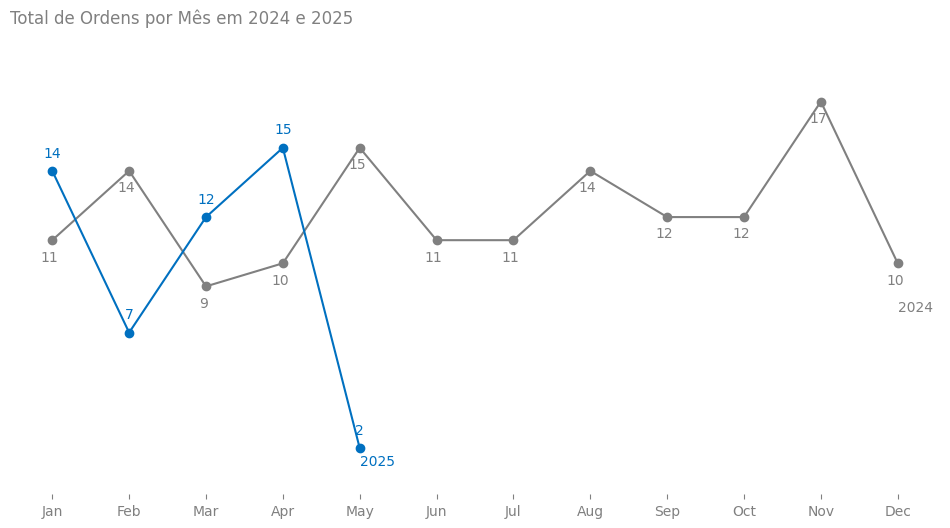

In [38]:


# Supondo que seu DataFrame seja df_la_ e a coluna de datas seja 'Sales Order Date'
# Certifique-se de que a coluna de datas esteja no formato datetime
df_la_['Sales Order Date'] = pd.to_datetime(df_la_['Sales Order Date'])

# Definindo os períodos
inicio_periodo_24 = '2024-01-01'
fim_periodo_24 = '2024-12-31'

inicio_periodo_25 = '2025-01-01'
fim_periodo_25 = '2025-12-31'

# Filtrando o DataFrame dentro do período especificado
df_filtrado_24 = df_la_[(df_la_['Sales Order Date'] >= inicio_periodo_24) & (df_la_['Sales Order Date'] <= fim_periodo_24)]
df_filtrado_25 = df_la_[(df_la_['Sales Order Date'] >= inicio_periodo_25) & (df_la_['Sales Order Date'] <= fim_periodo_25)]

# Criar mapeamento de meses
meses_ordem = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Adicionar coluna "Mes" ao DataFrame
df_filtrado_24['Mes'] = df_filtrado_24['Sales Order Date'].dt.strftime('%b')
df_filtrado_25['Mes'] = df_filtrado_25['Sales Order Date'].dt.strftime('%b')

# Garantir que a ordem dos meses seja respeitada
df_filtrado_24['Mes'] = pd.Categorical(df_filtrado_24['Mes'], categories=meses_ordem, ordered=True)
df_filtrado_25['Mes'] = pd.Categorical(df_filtrado_25['Mes'], categories=meses_ordem, ordered=True)

# Agrupando pelo número da ordem SAP e contando as ordens por mês
# Contando todas as ordens, sem filtrar por Unique
total_ordens_24 = df_filtrado_24.groupby('Mes')['SAP Sales Order Number'].nunique()
total_ordens_25 = df_filtrado_25.groupby('Mes')['SAP Sales Order Number'].nunique()

# Garantir que os valores estão ordenados
valores_ordens_24 = [total_ordens_24.get(mes, 0) for mes in meses_ordem]
valores_ordens_25 = [total_ordens_25.get(mes, 0) for mes in meses_ordem]

# Remover meses sem dados para 2025
meses_com_dados_25 = [mes for mes, valor in zip(meses_ordem, valores_ordens_25) if valor > 0]
valores_ordens_com_dados_25 = [valor for valor in valores_ordens_25 if valor > 0]

# Criar gráfico de linhas com tamanho ajustado
fig, ax = plt.subplots(figsize=(12, 6))  # Ajuste o tamanho da figura (largura, altura)
ax.plot(meses_ordem, valores_ordens_24, marker='o', label='Ordens (2024)', color='gray')
ax.plot(meses_com_dados_25, valores_ordens_com_dados_25, marker='o', label='Ordens (2025)', color='#0070C0')

# Adicionar os valores nas marcações
for i, valor in enumerate(valores_ordens_24):
    ax.annotate(str(valor), (meses_ordem[i], valores_ordens_24[i]), textcoords="offset points", xytext=(-2,-15), ha='center', color='gray')

for i, valor in enumerate(valores_ordens_com_dados_25):
    ax.annotate(str(valor), (meses_com_dados_25[i], valores_ordens_com_dados_25[i]), textcoords="offset points", xytext=(0,10), ha='center', color='#0070C0')

# Remover bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Configurar escala do eixo y para começar em 0 e terminar em 20
ax.set_ylim(0, 20)

# Remover números do eixo y
ax.set_yticks([])

# Configurar rótulos e título
ax.set_title('Total de Ordens por Mês em 2024 e 2025', loc='left', color='gray')

# Adicionar legenda abaixo de cada linha
ax.annotate('2024', xy=(meses_ordem[-1], valores_ordens_24[-1]), xytext=(0, -35), textcoords='offset points', color='gray')
ax.annotate('2025', xy=(meses_com_dados_25[-1], valores_ordens_com_dados_25[0]), xytext=(0, -212), textcoords='offset points', color='#0070C0')

# Ajustar cor dos rótulos do eixo 
ax.tick_params(axis='x', colors='gray')

# Exibir gráfico
plt.show()


In [ ]:
import plotly.express as px
import pandas as pd

# Extraindo o ano da coluna 'Sales Order Date'
df_la_['Ano'] = pd.DatetimeIndex(df_la_['Sales Order Date']).year

# Contando o número total de vendas por setor, nome do produto e ano
df_total = df_la_.groupby(['Setor', 'Product Name', 'Ano'])['SAP Sales Order Number'].count().reset_index()

# Calculando a proporção de vendas dentro de cada setor e ano
df_total['Proporção'] = df_total.groupby(['Setor', 'Ano'])['SAP Sales Order Number'].transform(lambda x: x / x.sum())

# Definindo um mapa de cores personalizado
color_map = {
    'SPSS Statistics': '#005A9E',      # Azul Escuro
    'Aspera': '#0070C0',               # Azul Médio
    'Cognos Analytics': '#3399FF',     # Azul Claro
    'Blueworks Live': '#D3D3D3',       # Cinza Claro
    'MaaS360': '#D3D3D3',              # Cinza Claro
    'ILOG CPLEX': '#D3D3D3',           # Cinza Claro
    'Learning - Data Science': '#D3D3D3'  # Cinza Claro
}

# Definindo a ordem das categorias
category_orders = {
    'Setor': ['Distribution Sector', 'Communication Sector', 'Public Sector', 'Health', 'Education', 'Financial Services'],
    'Product Name': ['SPSS Statistics', 'Aspera', 'Cognos Analytics', 'Blueworks Live', 'MaaS360', 'ILOG CPLEX', 'Learning - Data Science']
}

# Criando o gráfico de barras empilhadas 100%
fig = px.bar(df_total, 
             x='Proporção', 
             y='Setor', 
             color='Product Name', 
             orientation='h', 
             title='Proporção de Vendas por Setor e Produto', 
             text='SAP Sales Order Number', 
             color_discrete_map=color_map, 
             category_orders=category_orders)

# Removendo os títulos dos eixos
fig.update_layout(
    xaxis_title=None,
    yaxis_title=None
)

# Adicionando o filtro interativo para selecionar o ano, incluindo a opção de "Ambos"
dropdown_buttons = [
    {'label': '2024', 'method': 'update', 'args': [{'visible': (df_total['Ano'] == 2024).tolist()}]},
    {'label': '2025', 'method': 'update', 'args': [{'visible': (df_total['Ano'] == 2025).tolist()}]},
    {'label': 'Ambos', 'method': 'update', 'args': [{'visible': [True] * len(df_total)}]}
]

# Atualizando o layout com o dropdown
fig.update_layout(
    updatemenus=[{
        'buttons': dropdown_buttons,
        'direction': 'down',
        'showactive': True,
        'x': 0.17,
        'xanchor': 'left',
        'y': 1.15,
        'yanchor': 'top'
    }]
)

# Exibindo o gráfico
fig.show()
